In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#Importando arquivos do Drive via código
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
df = pd.read_excel('AdventureWorks.xlsx')

In [4]:
df.head()

Data Venda Data Envio  ID Loja  ...            Marca   Classe  Cor
0 2008-05-09 2008-05-29      199  ...  Adventure Works  Regular  Red
1 2008-05-12 2008-05-17      306  ...  Adventure Works  Regular  Red
2 2008-05-14 2008-05-20      306  ...  Adventure Works  Regular  Red
3 2008-05-21 2008-05-27      306  ...  Adventure Works  Regular  Red
4 2008-06-20 2008-06-27      306  ...  Adventure Works  Regular  Red

[5 rows x 16 columns]

In [5]:
df.shape

(904, 16)

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
#Valor total de receitas
df['Valor Venda'].sum()

5984606.1426

**Exibir o gráfico referente ao lucro ao longo dos meses**

In [27]:
#Agrupando as informações
df['Custo'] = df['Custo Unitário'].mul(df.Quantidade)
df.head()

Data Venda Data Envio  ID Loja  ...  Cor        Lucro    Custo
0 2008-05-09 2008-05-29      199  ...  Red          NaN  2091.48
1 2008-05-12 2008-05-17      306  ...  Red  360246.3120  2091.48
2 2008-05-14 2008-05-20      306  ...  Red  567312.7236  2091.48
3 2008-05-21 2008-05-27      306  ...  Red  427694.5040  2091.48
4 2008-06-20 2008-06-27      306  ...  Red  288370.4560  2091.48

[5 rows x 18 columns]

In [29]:
#Custo total
round(df.Custo.sum(),2)

2486783.05

In [32]:
#Com a receita e o custo total, determinamos o lucro
df['Lucro']= df['Valor Venda']-df['Custo']
round(df.Lucro.sum(),2) #formatando para duas casas decimais

3497823.09

In [33]:
df.head()

Data Venda Data Envio  ID Loja  ID Produto  ...   Classe  Cor    Lucro    Custo
0 2008-05-09 2008-05-29      199         384  ...  Regular  Red  2456.52  2091.48
1 2008-05-12 2008-05-17      306         384  ...  Regular  Red  2456.52  2091.48
2 2008-05-14 2008-05-20      306         384  ...  Regular  Red  2456.52  2091.48
3 2008-05-21 2008-05-27      306         384  ...  Regular  Red  2456.52  2091.48
4 2008-06-20 2008-06-27      306         384  ...  Regular  Red  2456.52  2091.48

[5 rows x 18 columns]

**Lucro por ano e marca**

In [36]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [35]:
pd.options.display.float_format = '{:20,.2f}'.format

In [38]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index() #o reset_index formata para tabela
lucro_ano

Data Venda            Marca                Lucro
0        2008  Adventure Works           306,641.16
1        2008          Contoso            56,416.00
2        2008         Fabrikam         1,557,020.55
3        2009  Adventure Works           405,395.08
4        2009          Contoso           138,258.95
5        2009         Fabrikam         1,034,091.35

In [50]:
#Total de Produtos vendidos
total_vendidos = df.groupby(df['Produto'])['Quantidade'].sum()
total_vendidos

Produto
Adventure Works Laptop15.4W M1548 Black             1089
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Name: Quantidade, dtype: int64

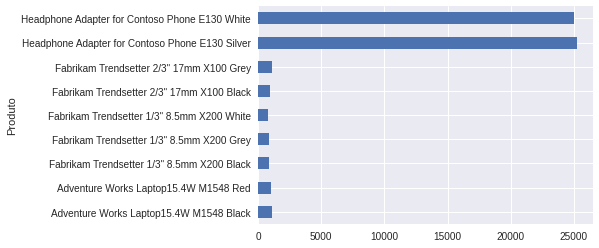

In [51]:
#Gráfico total de produtos 
df.groupby(df['Produto'])['Quantidade'].sum().plot.barh()

In [52]:
#Lucrox Ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

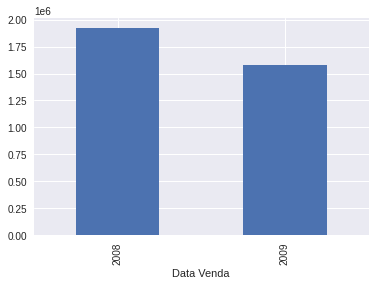

In [54]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar()

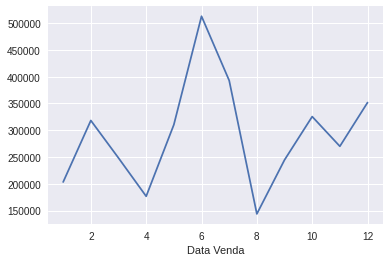

In [59]:
#Calculando o Lucro mensal do ano 2009
lucro_2009 = df.groupby(df['Data Venda'].dt.month)['Lucro'].sum()
#Exibindo o gráfico
lucro_2009.plot()